# Stable Diffusion Model for Text-to-Image Generation

Welcome to this Jupyter Notebook, where we will explore the Stable Diffusion model designed for generating images based on text prompts.

The Stable Diffusion model, developed by the collaborative efforts of researchers and engineers from CompVis, Stability AI, and LAION, is a powerful text-to-image latent diffusion model. 
Trained on 512x512 images from a subset of the LAION-5B database, this model leverages a frozen CLIP ViT-L/14 text encoder to condition itself on text prompts. 
Despite its capabilities, the model is relatively lightweight, featuring an 860M UNet and a 123M text encoder, making it compatible with many consumer GPUs.

For more details, example codes, and model cards, please refer to https://huggingface.co/models?other=stable-diffusion .

## Getting Started

Before delving into the theoretical aspects of how Stable Diffusion functions, let's quickly demonstrate how to run text-to-image inference in just a few lines of code.

Note: *Ensure that you are using a GPU runtime for faster inference. You can use the 'nvidia-smi' command to check GPU availability.*

### Installation

Make sure to install the required libraries using the following commands: 
    pip install diffusers scipy ftfy transformers accelerate

These libraries are essential for running the notebook smoothly.

In [2]:
#First import diffusion library and other related libraries
import sys
import torch
sys.path.insert(0, '/home/ubuntu/stable/diffusers') 
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

## Model Initialization

The 'StableDiffusionPipeline' is an end-to-end inference pipeline for generating images from text with minimal code.

Specify the Stable Diffusion version (e.g., 2.1), or explore other variants like CompVis/stable-diffusion-v1-4, stabilityai/stable-diffusion-2-1-base, etc.

In this Jupyter Notebook, you have the flexibility to generate images based on custom prompts. 

To do so, simply provide a prompt or any text that serves as input to the model pipe, which will then generate an image describing the provided prompt.

Load pre-trained weights of all components:
*pipeline = StableDiffusionPipeline()*

In [ ]:
model_id = "stabilityai/stable-diffusion-2-1"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16) #diffusers to expect the weights in float16 precision by passing torch_dtype=torch.float16
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
#move the pipeline to GPU to have faster inference
pipe = pipe.to("cuda") 

In this Jupyter Notebook, you have the flexibility to generate images based on custom prompts. 

To do so, simply provide a prompt or any text that serves as input to the model pipe, which will then generate an image describing the provided prompt.

In [2]:
prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]
    
image.save("astronaut_rides_horse.png")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

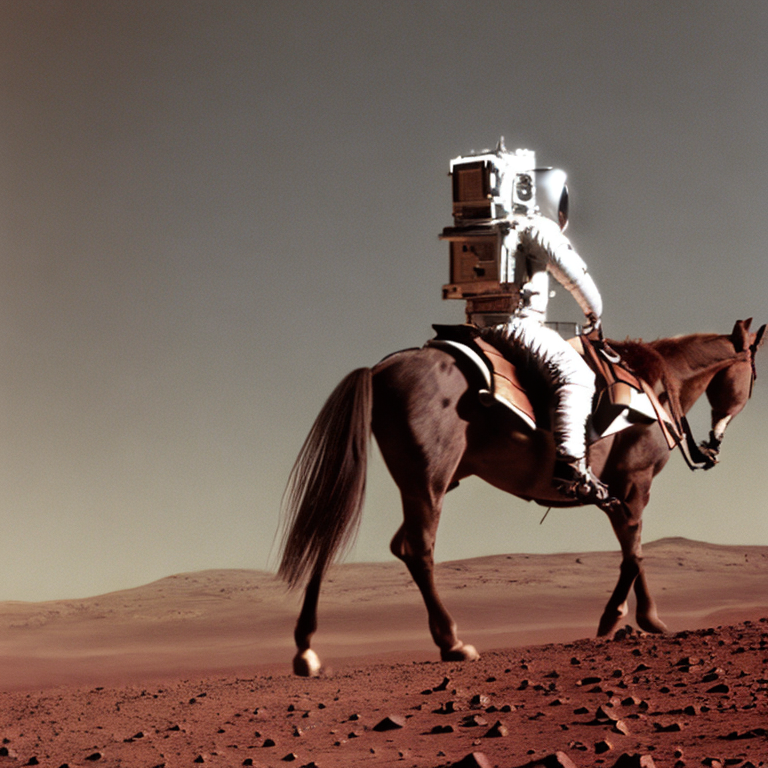

In [3]:
image

To explore the components of our Stable Diffusion model, execute the "dir" command, which will display all the elements within the pipe associated with the Stable Diffusion model.

In [4]:
dir(pipe)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_convert_kohya_lora_to_diffusers',
 '_deprecated_kwargs',
 '_dict_from_json_file',
 '_encode_prompt',
 '_exclude_from_cpu_offload',
 '_execution_device',
 '_get_init_keys',
 '_get_signature_keys',
 '_internal_dict',
 '_is_onnx',
 '_load_connected_pipes',
 '_map_sgm_blocks_to_diffusers',
 '_maybe_convert_prompt',
 '_modify_text_encoder',
 '_optional_components',
 '_progress_bar_config',
 '_remove_text_encoder_monkey_patch',
 '_remove_text_encoder_monkey_patch_classmethod',
 '_upload_folder',
 'check_inputs',
 'components',
 'config',
 'config_name',
 'decode_latents',
 'device',
 'disable_atte

The Stable Diffusion model is built upon a specific type of diffusion model known as Latent Diffusion. This model comprises three essential components:

1. An autoencoder (VAE).
2. A U-Net
3. A text-encoder, *e.g.* CLIP's Text Encoder
 

In [5]:
pipe.components.keys()

dict_keys(['vae', 'text_encoder', 'tokenizer', 'unet', 'scheduler', 'safety_checker', 'feature_extractor'])

In [10]:
pipe.components

{'vae': AutoencoderKL(
   (encoder): Encoder(
     (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (down_blocks): ModuleList(
       (0): DownEncoderBlock2D(
         (resnets): ModuleList(
           (0-1): 2 x ResnetBlock2D(
             (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
             (conv1): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
             (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
             (dropout): Dropout(p=0.0, inplace=False)
             (conv2): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
             (nonlinearity): SiLU()
           )
         )
         (downsamplers): ModuleList(
           (0): Downsample2D(
             (conv): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(2, 2))
           )
         )
       )
       (1): DownEncoderBlock2D(
         (resnets): ModuleList(
           (0): ResnetBlock2D(
           

## The autoencoder (VAE)

The VAE model consists of an encoder and a decoder. The encoder converts an image into a low-dimensional latent representation, which serves as input for the U-Net model. Conversely, the decoder transforms the latent representation back into an image.

In [6]:
pipe.components['vae']

AutoencoderKL(
  (encoder): Encoder(
    (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down_blocks): ModuleList(
      (0): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0-1): 2 x ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (conv2): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (nonlinearity): SiLU()
          )
        )
        (downsamplers): ModuleList(
          (0): Downsample2D(
            (conv): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(2, 2))
          )
        )
      )
      (1): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0): ResnetBlock2D(
            (norm1): GroupNorm(32, 128, ep

In [8]:
for n,m in pipe.components['vae'].named_modules():
    print(n, m)

 AutoencoderKL(
  (encoder): Encoder(
    (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down_blocks): ModuleList(
      (0): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0-1): 2 x ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (conv2): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (nonlinearity): SiLU()
          )
        )
        (downsamplers): ModuleList(
          (0): Downsample2D(
            (conv): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(2, 2))
          )
        )
      )
      (1): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0): ResnetBlock2D(
            (norm1): GroupNorm(32, 128, e

## The U-Net

The U-Net features both an encoder and a decoder, each composed of ResNet blocks. 

The encoder compresses the image representation into a lower-resolution form, while the decoder decodes it back to the original higher-resolution image representation, aiming for reduced noise. 
Specifically, the U-Net output predicts the noise residual, enabling the computation of the denoised image representation.

In [7]:
pipe.components['unet']

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): LoRACompatibleLinear(in_features=320, out_features=320, bias=True)
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_featu

## The Text-encoder

The text-encoder transforms input prompts (e.g., "An astronaut riding a horse") into an embedding space understood by the U-Net. Typically, it is a straightforward transformer-based encoder mapping a sequence of input tokens to a sequence of latent text embeddings.

In [9]:
pipe.components['text_encoder']

CLIPTextModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 1024)
      (position_embedding): Embedding(77, 1024)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-22): 23 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1024, out_features=4096, bias=True)
            (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          )
          (layer_norm2): LayerNorm((1024,

## Visualizing the Full Model:

Execute the appropriate commands to combine and visualize all components of the Stable Diffusion model.

In [18]:
import torch.nn as nn


class CompleteModel(nn.Module):
    def __init__(self, components):
        super(CompleteModel, self).__init__()
        
        # Define the components as attributes of the complete model
        self.vae = components['vae']
        self.text_encoder = components['text_encoder']
   
        self.unet = components['unet']

    def forward(self, input_data):
       
        text_features = self.text_encoder(input_data['text'])
        image_features = self.unet(input_data['image'])
        
        combined_features = text_features + image_features
      

        return combined_features

# Instantiate the complete model
complete_model = CompleteModel(pipe.components)

# Move the complete model to the desired device
complete_model = complete_model.to("cuda")


In [16]:
complete_model

CompleteModel(
  (vae): AutoencoderKL(
    (encoder): Encoder(
      (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (down_blocks): ModuleList(
        (0): DownEncoderBlock2D(
          (resnets): ModuleList(
            (0-1): 2 x ResnetBlock2D(
              (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
              (conv1): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
              (dropout): Dropout(p=0.0, inplace=False)
              (conv2): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (nonlinearity): SiLU()
            )
          )
          (downsamplers): ModuleList(
            (0): Downsample2D(
              (conv): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(2, 2))
            )
          )
        )
        (1): DownEncoderBlock2D(
          (resnets): ModuleList(
    

## Checking Each Component's Content:

Explore the content of each component using a different library, allowing you to inspect the model summary for a comprehensive understanding.

In [7]:
from helper_utils import *

In [12]:
model_summary(pipe.components['vae'])

{'AutoencoderKL': 1,
 'Encoder': 1,
 'Conv2d': 6,
 'ModuleList': 22,
 'DownEncoderBlock2D': 4,
 'ResnetBlock2D': 24,
 'GroupNorm': 52,
 'LoRACompatibleConv': 58,
 'Dropout': 26,
 'SiLU': 26,
 'Downsample2D': 3,
 'UNetMidBlock2D': 2,
 'Attention': 2,
 'Linear': 8,
 'Decoder': 1,
 'UpDecoderBlock2D': 4,
 'Upsample2D': 3,
 'Parameters': '83.653863M'}

In [13]:
model_summary(pipe.components['text_encoder'])

{'CLIPTextModel': 1,
 'CLIPTextTransformer': 1,
 'CLIPTextEmbeddings': 1,
 'Embedding': 2,
 'CLIPEncoder': 1,
 'ModuleList': 1,
 'CLIPEncoderLayer': 23,
 'CLIPAttention': 23,
 'Linear': 138,
 'LayerNorm': 47,
 'CLIPMLP': 23,
 'GELUActivation': 23,
 'Parameters': '340.38784M'}

In [15]:
model_summary(pipe.components['unet'])

{'UNet2DConditionModel': 1,
 'Conv2d': 2,
 'Timesteps': 1,
 'TimestepEmbedding': 1,
 'Linear': 130,
 'SiLU': 24,
 'ModuleList': 88,
 'CrossAttnDownBlock2D': 3,
 'Transformer2DModel': 16,
 'GroupNorm': 61,
 'LoRACompatibleLinear': 86,
 'BasicTransformerBlock': 16,
 'LayerNorm': 48,
 'Attention': 32,
 'Dropout': 70,
 'FeedForward': 16,
 'GEGLU': 16,
 'ResnetBlock2D': 22,
 'LoRACompatibleConv': 64,
 'Downsample2D': 3,
 'DownBlock2D': 1,
 'UpBlock2D': 1,
 'Upsample2D': 3,
 'CrossAttnUpBlock2D': 3,
 'UNetMidBlock2DCrossAttn': 1,
 'Parameters': '865.910724M'}

## "scheduler"  
The "scheduler" refers to the scheduling algorithm employed to progressively add noise to the image during training. This plays a crucial role in the training process, contributing to the effectiveness of the Stable Diffusion model.

In [19]:
pipe.components['scheduler']

DPMSolverMultistepScheduler {
  "_class_name": "DPMSolverMultistepScheduler",
  "_diffusers_version": "0.20.2",
  "algorithm_type": "dpmsolver++",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "dynamic_thresholding_ratio": 0.995,
  "lambda_min_clipped": -Infinity,
  "lower_order_final": true,
  "num_train_timesteps": 1000,
  "prediction_type": "v_prediction",
  "sample_max_value": 1.0,
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "solver_order": 2,
  "solver_type": "midpoint",
  "steps_offset": 1,
  "thresholding": false,
  "timestep_spacing": "linspace",
  "trained_betas": null,
  "use_karras_sigmas": false,
  "variance_type": null
}

In [20]:
pipe.components['feature_extractor']

CLIPImageProcessor {
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": true,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "CLIPFeatureExtractor",
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "CLIPImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  }
}

Feel free to interact with and explore the notebook to gain insights into the intricacies of the Stable Diffusion model.